In [1]:
import numpy as np
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator

import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
log_dir = 'gan_mnist_logs'
version = 0
log_dir = f'{log_dir}/default/version_{version}'

In [3]:
import os

def get_all_files(dir):
    filelist = []

    for root, dirs, files in os.walk(dir):
        for file in files:
            if 'event' in file.lower():
                filelist.append(os.path.join(root, file))

    return filelist

In [4]:
log_file = get_all_files(log_dir)[0]

In [16]:
def plot_tensorflow_log(path, evt_names=None, poly_order=10):

    # Loading too much data is slow...
    tf_size_guidance = {
        'compressedHistograms': 10,
        'images': 0,
        'scalars': 100,
        'histograms': 1
    }

    event_acc = EventAccumulator(path, tf_size_guidance)
    event_acc.Reload()

    # Show all tags in the log file
    tags = event_acc.Tags()
    
    evt_scalars = []
    for scalar in tags['scalars']:
        if scalar != 'epoch':
            evt_scalars.append(event_acc.Scalars(scalar))

    epoch_scalars = event_acc.Scalars('epoch')
    epochs = []
    for e in epoch_scalars:
        epochs.append(e.value)

    

    fig = plt.figure(figsize=(15,10))
    for i in range(len(evt_scalars)):
        x = []
        y = np.zeros(len(evt_scalars[i]))
        for j in range(len(evt_scalars[i])):
            x.append(evt_scalars[i][j].step)
            y[j] = evt_scalars[i][j].value
        
        z = np.polyfit(x, y, poly_order)
        f = np.poly1d(z)
        
        x_fit = np.linspace(x[0], x[-1], 50)
        y_fit = f(x_fit)
        
        plt.scatter(x, y, label=evt_names[i])
        plt.plot(x_fit, y_fit, label=evt_names[i] + '_fit')
        plt.xlabel("steps")
        plt.legend(loc='upper right', frameon=True)
        
    plt.show()
    
#     # VALUES VS. EPOCHS PLOT
#     fig = plt.figure(figsize=(15,10))
#     for i in range(len(evt_scalars)):
#         for j in range(len(steps)):
#             y[i, j] = evt_scalars[i][j].value
        
#         plt.plot(epochs, y[i, :], label=evt_names[i])
#         plt.xlabel("epochs")
#         plt.legend(loc='upper right', frameon=True)
        
#     plt.show()

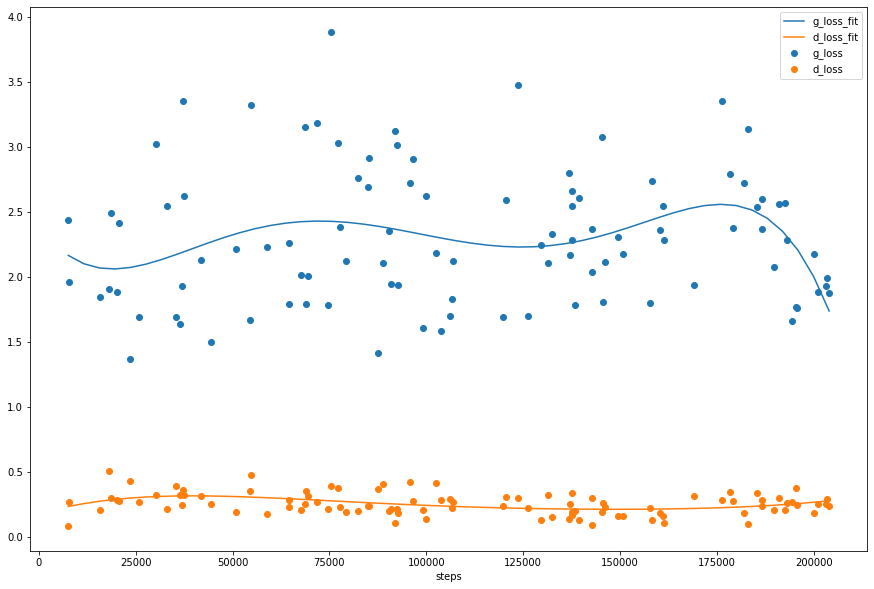

In [19]:
plot_tensorflow_log(log_file, ['g_loss', 'd_loss'], poly_order=5)